In [1]:
%load_ext autoreload
%autoreload 2
%load_ext watermark
%watermark -a "Kenneth Brezinski" -v

Author: Kenneth Brezinski

Python implementation: CPython
Python version       : 3.9.10
IPython version      : 8.0.1



In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%watermark --iversions

numpy     : 1.22.2
matplotlib: 3.5.1
pandas    : 1.4.1



In [3]:
## workplace retail and transit?
df = pd.read_csv('data/CAN-mobility.csv')
df.head()

,date,location_key,mobility_retail_and_recreation,mobility_grocery_and_pharmacy,mobility_parks,mobility_transit_stations,mobility_workplaces,mobility_residential
0,2020-02-15,AB,7.0,3.0,24.0,7.0,-2.0,-1.0
1,2020-02-16,AB,10.0,-2.0,28.0,3.0,-3.0,-2.0
2,2020-02-17,AB,-7.0,-2.0,10.0,-40.0,-67.0,15.0
3,2020-02-18,AB,-1.0,1.0,-2.0,-9.0,-5.0,2.0
4,2020-02-19,AB,3.0,4.0,21.0,-7.0,-1.0,1.0


In [5]:
## only categroized by provinces, not subregions
df['location_key'].unique()

array(['AB', 'BC', 'MB', 'NB', 'NL', 'NS', 'NT', 'NU', 'ON', 'PE', 'QC',
       'SK', 'YT'], dtype=object)

In [6]:
# sanity check to check which columns have missing elements
# all of them are in provinces not if interest

# loop through provinces
for province in df['location_key'].unique():
    
    # fetch provincial data
    tmp = df[df['location_key'] == province]
    
    # loop through mobility metrics
    for metric in tmp.columns:
        # check if column has missing data
        if tmp[metric].isnull().sum() == 0:   
            continue
        # print missing occurances
        print(f"{province}:{metric}: {tmp[metric].isnull().sum()} missing")   

MB:mobility_parks: 26 missing
NB:mobility_parks: 76 missing
NB:mobility_transit_stations: 28 missing
NL:mobility_retail_and_recreation: 3 missing
NL:mobility_grocery_and_pharmacy: 20 missing
NL:mobility_parks: 113 missing
NL:mobility_transit_stations: 105 missing
NL:mobility_workplaces: 3 missing
NS:mobility_parks: 60 missing
NS:mobility_transit_stations: 3 missing
NT:mobility_retail_and_recreation: 70 missing
NT:mobility_grocery_and_pharmacy: 591 missing
NT:mobility_parks: 692 missing
NT:mobility_transit_stations: 120 missing
NT:mobility_workplaces: 6 missing
NT:mobility_residential: 692 missing
NU:mobility_retail_and_recreation: 544 missing
NU:mobility_grocery_and_pharmacy: 575 missing
NU:mobility_parks: 575 missing
NU:mobility_transit_stations: 575 missing
NU:mobility_workplaces: 6 missing
NU:mobility_residential: 575 missing
PE:mobility_retail_and_recreation: 20 missing
PE:mobility_grocery_and_pharmacy: 20 missing
PE:mobility_parks: 702 missing
PE:mobility_transit_stations: 712 mis

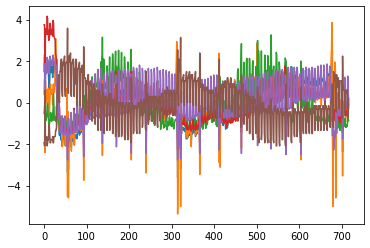

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

## performs quite well; better to just stick to StandardScalar
X = df[df['location_key'] == 'ON'].iloc[:, 2:]

pipe = Pipeline([('scaler', StandardScaler()),
                 ('knn', KNNImputer(n_neighbors=5, weights="distance"))])
trans = pipe.fit_transform(X)

plt.plot(trans)
plt.show()